# Frequentist Inference Case Study - Part B

## Learning objectives

Welcome to Part B of the Frequentist inference case study! The purpose of this case study is to help you apply the concepts associated with Frequentist inference in Python. In particular, you'll practice writing Python code to apply the following statistical concepts: 
* the _z_-statistic
* the _t_-statistic
* the difference and relationship between the two
* the Central Limit Theorem, including its assumptions and consequences
* how to estimate the population mean and standard deviation from a sample
* the concept of a sampling distribution of a test statistic, particularly for the mean
* how to combine these concepts to calculate a confidence interval

In the previous notebook, we used only data from a known normal distribution. **You'll now tackle real data, rather than simulated data, and answer some relevant real-world business problems using the data.**

## Hospital medical charges

Imagine that a hospital has hired you as their data scientist. An administrator is working on the hospital's business operations plan and needs you to help them answer some business questions. 

In this assignment notebook, you're going to use frequentist statistical inference on a data sample to answer the questions:
* has the hospital's revenue stream fallen below a key threshold?
* are patients with insurance really charged different amounts than those without?

Answering that last question with a frequentist approach makes some assumptions, and requires some knowledge, about the two groups.

We are going to use some data on medical charges obtained from [Kaggle](https://www.kaggle.com/easonlai/sample-insurance-claim-prediction-dataset). 

For the purposes of this exercise, assume the observations are the result of random sampling from our single hospital. Recall that in the previous assignment, we introduced the Central Limit Theorem (CLT), and its consequence that the distributions of sample statistics approach a normal distribution as $n$ increases. The amazing thing about this is that it applies to the sampling distributions of statistics that have been calculated from even highly non-normal distributions of data! Recall, also, that hypothesis testing is very much based on making inferences about such sample statistics. You're going to rely heavily on the CLT to apply frequentist (parametric) tests to answer the questions in this notebook.

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import t
from numpy.random import seed
medical = pd.read_csv('insurance2.csv')

In [44]:
from scipy import stats

In [2]:
medical.shape

(1338, 8)

In [3]:
medical.head()

,age,sex,bmi,children,smoker,region,charges,insuranceclaim
0,19,0,27.900,0,1,3,16884.92400,1
1,18,1,33.770,1,0,2,1725.55230,1
2,28,1,33.000,3,0,2,4449.46200,0
3,33,1,22.705,0,0,1,21984.47061,0
4,32,1,28.880,0,0,1,3866.85520,1


__Q1:__ Plot the histogram of charges and calculate the mean and standard deviation. Comment on the appropriateness of these statistics for the data.

__A:__

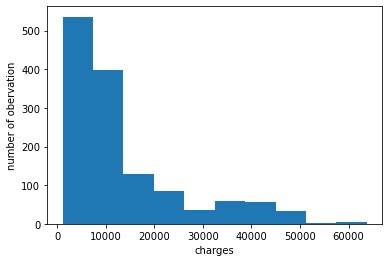

In [4]:
_=plt.hist(medical['charges'])
_=plt.xlabel('charges')
_=plt.ylabel('number of obervation')

In [5]:
def std_dev_pop(arr):
    n = len(arr)-1
    mean = np.mean(arr) 
    var =  sum((x - mean)**2 for x in arr) / n
    std_dev = np.sqrt(var) #var ** 0.5
    return std_dev

In [6]:
charge_mean = np.mean(medical['charges'])
charge_mean

13270.422265141257

In [7]:
charge_std = std_dev_pop(medical['charges'])
charge_std

12110.011236693994

the sample from population is not normaly distruted so we can not infer statistic on population

__Q2:__ The administrator is concerned that the actual average charge has fallen below 12,000, threatening the hospital's operational model. On the assumption that these data represent a random sample of charges, how would you justify that these data allow you to answer that question? And what would be the most appropriate frequentist test, of the ones discussed so far, to apply?

__A:__  We are going to use the Central Limit Theorem (CLT) because the distribution of sample is not normal, and use t test 

In [8]:
# And what would be the most appropriate frequentist test, of the ones discussed so far, to apply?

__Q3:__ Given the nature of the administrator's concern, what is the appropriate confidence interval in this case? A ***one-sided*** or ***two-sided*** interval? (Refresh your understanding of this concept on p. 399 of the *AoS*). Calculate the critical value and the relevant 95% confidence interval for the mean, and comment on whether the administrator should be concerned.

__A:__

In [9]:
seed = 47
# Boostrap of the one sample
Bs_sample = np.random.choice(medical['charges'], size=len(medical['charges']))
# compute the mean of one sample
Bs_sample_mean = np.mean(Bs_sample)
Bs_sample_mean

12987.895071704035

In [10]:
def boostrap_one_sample(arr, func):
    bs_sample = np.random.choice(arr, len(arr)) # one boostrap sample
    return func(bs_sample) # one boostrap replicate 

In [11]:
def boostrap_rep_many(arr, func, size=1):
    
    bs_sample_rep = np.empty(size) # fill all the mean  from all boostrap_one_sample
    
    for i in range(size):  # number of replicate to compute as the mean 
        bs_sample_rep[i] = boostrap_one_sample(arr, func) # cumpute one replicate or one mean
    return bs_sample_rep  

In [12]:
seed = 47
bs_sample_5000 = boostrap_rep_many(medical['charges'], np.mean, 5000)

In [13]:
import seaborn as sns

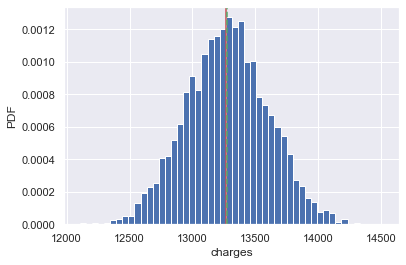

In [14]:
#  histogram of bs_sample_5000
sns.set()
_ = plt.hist(bs_sample_5000, bins=50, density=True)
_ = plt.axvline(np.mean(medical['charges']), color='r')
_ = plt.axvline(np.mean(bs_sample_5000), color='g', linestyle='--')
_ = plt.xlabel('charges')
_ = plt.ylabel('PDF')

In [15]:
#standard error of the mean  (std_population/np.sqrt(n))
SEM =  std_dev_pop(medical['charges'])/np.sqrt(len(bs_sample_5000))
SEM

171.26142131423222

In [22]:
# mean of distribution
bs_sample_5000_mean = np.mean(bs_sample_5000)
bs_sample_5000_mean

13274.468420956127

In [26]:
len(bs_sample_5000)

5000

In [32]:
#critical value for one side 
alpha = 1 - 0.95
prob = 0.95
critical_value = t.ppf(1 - 0.05, 4999)
#print(crit)
print(critical_value)

1.6451584985826644


In [30]:
# compte the margin error 
margin_error = critical_value * SEM
margin_error

281.7521827544554

In [31]:
# compte the the 95% confidence interval  it is the (mean +/- 1.6 std)
CI = [bs_sample_5000_mean - margin_error, bs_sample_5000_mean + margin_error]
CI

[12992.716238201672, 13556.220603710583]

WE can state that the 95% of the charges of the hospital will fall within the interval of 12992.72 and 13556.22

The administrator then wants to know whether people with insurance really are charged a different amount to those without.

__Q4:__ State the null and alternative hypothesis here. Use the _t_-test for the difference between means, where the pooled standard deviation of the two groups is given by:
\begin{equation}
s_p = \sqrt{\frac{(n_0 - 1)s^2_0 + (n_1 - 1)s^2_1}{n_0 + n_1 - 2}}
\end{equation}

and the *t*-test statistic is then given by:

\begin{equation}
t = \frac{\bar{x}_0 - \bar{x}_1}{s_p \sqrt{1/n_0 + 1/n_1}}.
\end{equation}

(If you need some reminding of the general definition of ***t-statistic***, check out the definition on p. 404 of *AoS*). 

What assumption about the variances of the two groups are we making here?

__A:__ The null hyphothesis is : people with insurance are charged the same amount to those without 

__Q5:__ Perform this hypothesis test both manually, using the above formulae, and then using the appropriate function from [scipy.stats](https://docs.scipy.org/doc/scipy/reference/stats.html#statistical-tests) (hint, you're looking for a function to perform a _t_-test on two independent samples). For the manual approach, calculate the value of the test statistic and then its probability (the p-value). Verify you get the same results from both.

__A:__ 

In [33]:
no_insurance = medical[medical['insuranceclaim'] == 0]['charges']
insurance = medical[medical['insuranceclaim'] == 1]['charges']
[no_insurance.shape, insurance.shape]

[(555,), (783,)]

In [ ]:
from scipy import stats

In [36]:
# mean of each sample
xo = np.mean(no_insurance)
x= np.mean(insurance)
# varaince of each sample
#var =  sum((x - mean)**2 for x in arr) / len(arr)
varo= sum((i - xo)**2 for i in no_insurance) / len(no_insurance)
var= sum((y - x)**2 for y in insurance) / len(insurance)
# standard deviasion of each sample
so = np.std(no_insurance)
s = np.std(insurance)
#Degrees of freedom doff
no =555
n =783
doff=no + n - 2

In [37]:
# Pooled variance
pool_var = ((554 * varo) + (782 * var ))/doff
pool_var

132532657.551345

In [38]:
# Pooled standard deviation
pool_S = np.sqrt(pool_var)
pool_S

11512.282899205744

In [39]:
# Test statistic: 
#a = x- xo 
#b= np.sqrt(1/no + 1/n)
#t = a / (pool_S*b)
t_stat = (xo - x)/ (pool_S*(np.sqrt(1/no + 1/n)))
t_stat

-11.901306943555385

In [51]:
# the significance level (α = 0.05)
alpha = (1 - 0.95)/2 # 0.025
doff= no + n - 2 #1336
t_value = 1.96 (read on the table)
t.ppf(alpha, 1336)

-1.9617412190546957

Conclusion: t_stat < t_value  so we fall to reject the null hypothesis 

In [49]:
# p value 
print ('the P value is', t.cdf(t_stat, doff)*2)

the P value is 4.090550214373795e-31


Congratulations! Hopefully you got the exact same numerical results. This shows that you correctly calculated the numbers by hand. Secondly, you used the correct function and saw that it's much easier to use. All you need to do is pass your data to it.

In [48]:
stats.ttest_ind(no_insurance, insurance)# equal_var=False)

Ttest_indResult(statistic=-11.893299030876712, pvalue=4.461230231620717e-31)

__Q6:__ Conceptual question: look through the documentation for statistical test functions in scipy.stats. You'll see the above _t_-test for a sample, but can you see an equivalent one for performing a *z*-test from a sample? Comment on your answer.

__A:__ the Z test is used when the population follows a normal distribution, the population standard deviation is known, and sample size is above 30. 

https://dfrieds.com/math/z-tests.html for Z test 

## Learning outcomes

Having completed this project notebook, you now have good hands-on experience:
* using the central limit theorem to help you apply frequentist techniques to answer questions that pertain to very non-normally distributed data from the real world
* performing inference using such data to answer business questions
* forming a hypothesis and framing the null and alternative hypotheses
* testing this using a _t_-test